
Group Members: Sinny Ye (sy544), Brian Liu (bjl229), Caio Teig (cb733)

### Introduction

**Research Question:** How does the performance (in terms of total returns and volatility) of large-cap stocks (S&P 500 ETF) compare to the broader market (Vanguard Total Stock Market ETF) over the past 10 years?

**Sub-Questions:**
1. Do they have a positive or negative correlation with each other? So those who invest in S&P could have an idea of how the Vanguard would react
2. How do both react to significant economic events, such as the COVID-19 pandemic, in terms of market drop and recovery?
3. How do both ETFs react to market drops and recoveries in response to these events, and what can this tell investors about market behavior?

### Data description and cleaning

In [15]:
!pip install import-ipynb
import import_ipynb
import phase2

### Preregistration statement

**Preregister Statement 1:**

<u>Hypothesis:</u> SPY demonstrates a faster recovery rate than VTI following significant economic downturns, such as the COVID-19 pandemic

<u>Rationale for Hypothesis:</u> 
* SPY tracks the 500 largest companies in the U.S. Most often, these companies have strong balance sheets, wide access to capital, and established operations. On the other hand, VTI encompasses the entire U.S. market, including small to mid-cap companies that may have less established operations and may have limited access to resources. During economic downturns and shortly after, company infrastructure plays a large part in enabling them to recover more quickly during a recovery phase.
* SPY has a high concentration in the technology sector, which tend to recover faster and even thrive during crises, as we have observed during the COVID-19 pandemic. VTI includes more exposure to cyclical sectors, such as energy and real estate, which can pose threat during economic uncertainty.

<u>Analysis:</u> Run a linear regression with time as the input variable (X), and cumulative returns for SPY and VTI during the recovery period after the COVID pandemic as output (Y). The slope of the regression model will indicate the recovery rate, therefore we will be testing whether BSPY > BVTIp

**Preregister Statement 2:**

Hypothesis: SPY exhibits stronger seasonal effects in its returns compared to VTI, with higher average returns in certain months (e.g., November-April) compared to other months (e.g., May-October). 

Rationale for Hypothesis: 
* SPY has historically shown a higher average during the November-April period, known as the "Sell in May and Go Away" phenomenon (Investopedia). Since 1990, SPY has averaged a return of about 3% annually from May to October, versus 6.3% from November to April. VTI's broader exposure to mid and small-cap stocks may dilute these seasonal trends, as small companies as less likely to experience the investor behavior tied to calendar-based strategies

Analysis: To test this, we could analyze the monthly average returns of SPY and VTI over multiple years to determine if there are consistent seasonal trends. Focusing on periods such as “November-April” and “May-October” 
Steps:
Calculate the monthly average returns for SPY and VTI over a multi-year period.
Perform a statistical test (t-test or ANOVA) to compare the returns for SPY and VTI during the November-April period versus the May-October period.
Determine if SPY shows a statistically significant seasonal pattern that differs from VTI.


**Preregister Statement 2:**

<u>Hypothesis:</u> Do significant economic events such as Federal Reserve interest rate changes, the COVID-19 pandemic, and trade conflicts (2014–2024) have a more pronounced impact on SPY’s daily returns than on VTI’s, and does this effect vary across different types of events?

<u>Analysis:</u>

- Data Analysis: Use these economic events: Covid-19 pandemic and market crashing (2020), Federal Reserve interest rate changes (2015, 2018, 2022), US-China Trade War (2018–2019), OR Russia-Ukraine Conflict (2022). For each event, we will define a custom window which is 1 week before and 1 week after the event.
- Regression Model: Combine SPY and VTI returns into a single dataset with a new binary variable for the stock index (`Index = 1` for SPY, `Index = 0` for VTI).
  - Fitting the regression: 
    `Return = B0 + B1(EventIndicator) + B2(Index) + B3(EventIndicator * Index) + ϵ`
    - EventIndicator: Dummy variable indicating whether a day falls within an event window (`1` for within the event window, `0` otherwise).
    - Index: Dummy variable for stock index (`1` for SPY, `0` for VTI).
    - EventIndicator * Index: Interaction term capturing the differential effect of events on SPY relative to VTI.
- Interpretation: The coefficient `B3` of the interaction term will indicate whether SPY’s daily returns are more sensitive to economic events compared to VTI. A positive and significant `B3` supports the hypothesis.


### Data analysis

**Statement 1:**

Date used for "end of COVID": On **May 13, 2021**, the Centers for Disease Control and Prevention (CDC) announced a significant update to its public health guidelines:

* Fully Vaccinated Individuals: The CDC stated that people who are fully vaccinated against COVID-19 no longer need to wear masks or practice physical distancing in most indoor and outdoor settings.
* National Impact: This change signaled a major shift in the U.S. pandemic response and was a strong indicator of returning to pre-pandemic normalcy.

VTI Recovery Rate (Slope): 0.000308211273454981
SPY Recovery Rate (Slope): 0.0003697486351372404


/var/folders/7k/252fj0t154l1k765gcmjfzvw0000gn/T/ipykernel_49022/776874442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TotalIndex['VTI_Cumulative_Normalized'] = (TotalIndex['VTI_Cumulative'] - vti_min) / (vti_max - vti_min)
/var/folders/7k/252fj0t154l1k765gcmjfzvw0000gn/T/ipykernel_49022/776874442.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TotalIndex['SPY_Cumulative_Normalized'] = (TotalIndex['SPY_Cumulative'] - spy_min) / (spy_max - spy_min)


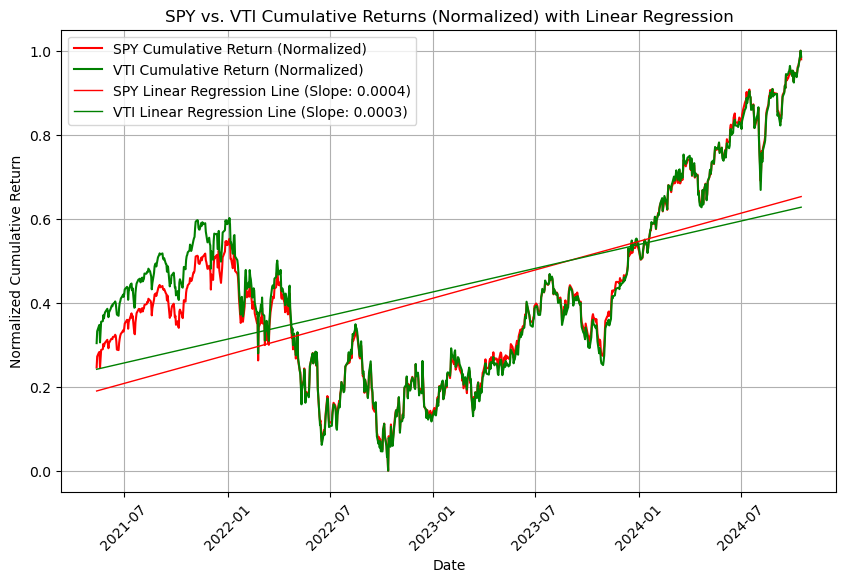

In [14]:
#Importing Total Index from Phase2 Notebook and setting the start of the recovery period
TotalIndex = phase2.TotalIndex
recovery_start_date = "2021-05-13"
TotalIndex = TotalIndex[TotalIndex['Date'] >= recovery_start_date]

# Linear Regression for VTI
vti_min = TotalIndex['VTI_Cumulative'].min()
vti_max = TotalIndex['VTI_Cumulative'].max()
TotalIndex['VTI_Cumulative_Normalized'] = (TotalIndex['VTI_Cumulative'] - vti_min) / (vti_max - vti_min)

x_vti = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_vti_cum_norm = TotalIndex['VTI_Cumulative_Normalized'].values


from sklearn.linear_model import LinearRegression
vti_model = LinearRegression()
vti_model.fit(x_vti, y_vti_cum_norm)
vti_pred_cum_norm = vti_model.predict(x_vti)

# Linear Regression for SPY
spy_min = TotalIndex['SPY_Cumulative'].min()
spy_max = TotalIndex['SPY_Cumulative'].max()
TotalIndex['SPY_Cumulative_Normalized'] = (TotalIndex['SPY_Cumulative'] - spy_min) / (spy_max - spy_min)

x_spy = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_spy_cum_norm = TotalIndex['SPY_Cumulative_Normalized'].values

spy_model = LinearRegression()
spy_model.fit(x_spy, y_spy_cum_norm)
spy_pred_cum_norm = spy_model.predict(x_spy)

# Extract the slopes of the regression lines
B_VTI = vti_model.coef_[0]
B_SPY = spy_model.coef_[0]

print("VTI Recovery Rate (Slope):", B_VTI)
print("SPY Recovery Rate (Slope):", B_SPY )

# Plot both regression lines
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot SPY and VTI normalized cumulative returns
plt.plot(TotalIndex['Date'], TotalIndex['SPY_Cumulative_Normalized'], color='red', label='SPY Cumulative Return (Normalized)')
plt.plot(TotalIndex['Date'], TotalIndex['VTI_Cumulative_Normalized'], color='green', label='VTI Cumulative Return (Normalized)')

# Plot regression lines
plt.plot(TotalIndex['Date'], spy_pred_cum_norm, color='red', label=f'SPY Linear Regression Line (Slope: {B_SPY:.4f})', linewidth=1)
plt.plot(TotalIndex['Date'], vti_pred_cum_norm, color='green', label=f'VTI Linear Regression Line (Slope: {B_VTI:.4f})', linewidth=1)

plt.title('SPY vs. VTI Cumulative Returns (Normalized) with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Evaluation of significance

### Conclusions

### Limitations

### Acknowledgements and Bibliography

1 Group Member is not a native english speaker

https://www.investopedia.com/terms/s/sell-in-may-and-go-away.asp#:~:text=%22Sell%20in%20May%20and%20go%20away%22%20is%20an%20adage%20referring,6.3%25%20from%20November%20to%20April.